First, lets get our data. It is the text file containing all of Shakespeare's work at http://www.gutenberg.org/cache/epub/100/pg100.txt .

In [1]:
TEXTFILE <- "data/pg100.txt"
if (!file.exists(TEXTFILE)) {
   dir.create(dirname(TEXTFILE), FALSE)
   download.file("http://www.gutenberg.org/cache/epub/100/pg100.txt", destfile = TEXTFILE)
}
shakespeare <- readLines(TEXTFILE)
length(shakespeare)

[1] 124787

124787 lines. Now, there are some headers and footers we need to remove.

In [2]:
head(shakespeare)
tail(shakespeare)

[1] "The Project Gutenberg EBook of The Complete Works of William Shakespeare, by"
[2] "William Shakespeare"                                                         
[3] ""                                                                            
[4] "This eBook is for the use of anyone anywhere at no cost and with"            
[5] "almost no restrictions whatsoever.  You may copy it, give it away or"        
[6] "re-use it under the terms of the Project Gutenberg License included"

[1] "http://www.gutenberg.org/2/4/6/8/24689"   
[2] ""                                         
[3] "An alternative method of locating eBooks:"
[4] "http://www.gutenberg.org/GUTINDEX.ALL"    
[5] ""                                         
[6] "*** END: FULL LICENSE ***"

In [3]:
shakespeare <- shakespeare[-(1:173)]
shakespeare <- shakespeare[-(124195:length(shakespeare))]
head(shakespeare)
tail(shakespeare)

[1] "1609"                   ""                       "THE SONNETS"           
[4] ""                       "by William Shakespeare" ""

[1] "  O, that sad breath his spongy lungs bestowed,"
[2] "  O, all that borrowed motion, seeming owed,"   
[3] "  Would yet again betray the fore-betrayed,"    
[4] "  And new pervert a reconciled maid.'"          
[5] ""                                               
[6] "THE END"

In [4]:
# Now, join all lines in a single string
shakespeare <- paste(shakespeare, collapse = " ")
nchar(shakespeare)

[1] 5436540

In [5]:
# Individual works are separated in the text by identifiers inside <<>>. We'll use that to get a list of works
works <- strsplit(shakespeare, "<<[^>]*>>")[[1]]
length(works)

[1] 218

In [6]:
# Still some cleaning up to do. Some of the works are not actually works, but lists of dramatis personae. We'll find their indices using a string search, and then remove them
(dramatis.personae <- grep("Dramatis Personae", works, ignore.case = TRUE))
works <- works[-dramatis.personae]
length(works)

[1]   2   8  11  17  23  28  33  43  49  55  62  68  74  81  87  93  99 105 111
[20] 117 122 126 134 140 146 152 158 164 170 176 182 188 194 200 206 212

[1] 182

In [7]:
# Next, we'll trasnform the list of works into a corpus, and run a number of preprocessing steps on it
library(tm)
doc.corpus <- VCorpus(VectorSource(works))
doc.corpus <- tm_map(doc.corpus, content_transformer(tolower))
doc.corpus <- tm_map(doc.corpus, removePunctuation)
doc.corpus <- tm_map(doc.corpus, removeNumbers)
doc.corpus <- tm_map(doc.corpus, removeWords, stopwords("english"))

library(SnowballC)
# Here, we're stemming all the words to return them to their base form 
doc.corpus <- tm_map(doc.corpus, stemDocument)

# Finally, clean up all white space that was introduced by the previous operations
doc.corpus <- tm_map(doc.corpus, stripWhitespace)
as.character(doc.corpus[8])

Loading required package: NLP


[1] "list(list(content = \" act ii scene messina pompey hous enter pompey menecr mena warlik manner pompey great god just shall assist deed justest men menecr know worthi pompey delay deni pompey while suitor throne decay thing sue menecr ignor beg often harm wise powr deni us good find profit lose prayer pompey shall well peopl love sea mine power crescent augur hope say will come th full mark antoni egypt sit dinner will make war without door caesar get money lose heart lepidus flatter flatterd neither love either care mena caesar lepidus field mighti strength carri pompey tis fals mena silvius sir pompey dream know rome togeth look antoni charm love salt cleopatra soften thi wand lip let witchcraft join beauti lust tie libertin field feast keep brain fume epicurean cook sharpen cloyless sauc appetit sleep feed may prorogu honour even till leth dull enter varrius now varrius varrius certain shall deliv mark antoni everi hour rome expect sinc went egypt tis space farther travel pompey given less matter better ear mena think amor surfeit donnd helm petti war soldiership twice twain let us rear higher opinion stir can lap egypt widow pluck neerlustweari antoni mena hope caesar antoni shall well greet togeth wife that dead trespass caesar brother warrd upon although think movd antoni pompey know mena lesser enmiti may give way greater weret stand twere pregnant squar entertain caus enough draw sword fear us may cement divis bind petti differ yet know bet god will havet stand live upon use strongest hand come mena exeunt scene ii rome hous lepidus enter enobarbus lepidus lepidus good enobarbus tis worthi deed shall becom well entreat captain soft gentl speech enobarbus shall entreat answer like caesar move let antoni look caesar head speak loud mar jupit wearer antonius beard shavet today lepidus tis time privat stomach enobarbus everi time serv matter born int lepidus small greater matter must give way enobarbus small come first lepidus speech passion pray stir ember come nobl antoni enter antoni ventidius enobarbus yonder caesar enter caesar maecena agrippa antoni compos well parthia hark ventidius caesar know maecena ask agrippa lepidus nobl friend combind us great let leaner action rend us what amiss may gentl heard debat trivial differ loud commit murder heal wound nobl partner rather earnest beseech touch sourest point sweetest term curst grow th matter antoni tis spoken well arini fight thus flourish caesar welcom rome antoni thank caesar sit antoni sit sir caesar nay sit antoni learn take thing ill concern caesar must laughd noth littl say offend chiefli world laughd name derog sound name concernd antoni egypt caesar wast caesar resid rome might egypt yet practis state egypt might question antoni intend practisd caesar may pleasd catch mine intent befal wife brother made war upon contest theme word war antoni mistak busi brother never urg act inquir learn true report drew sword rather discredit author make war alik stomach alik caus letter satisfi youll patch quarrel matter whole make must caesar prais lay defect judgment patchd excus antoni know lack certain ont necess thought partner caus gainst fought grace eye attend war front mine peac wife spirit anoth third o th world snaffl may pace easi wife enobarbus wive men might go war women antoni much uncurb garboil caesar made impati want shrewd polici griev grant much disquiet must say help caesar wrote riot alexandria pocket letter taunt gibe missiv audienc antoni sir fell upon ere admit three king newli feast want th morn next day told much askd pardon let fellow noth strife contend question wipe caesar broken articl oath shall never tongu charg lepidus soft caesar antoni lepidus let speak honour sacr talk now suppos lackd caesar articl oath caesar lend arm aid requird deni antoni neglect rather poison hour bound mine knowledg near may ill play penit mine honesti shall make poor great power work without truth fulvia egypt made war ignor motiv far ask pardon befit mine h

In [8]:
# Now, rip these nice texts into bags of words.
TDM <- TermDocumentMatrix(doc.corpus)
inspect(TDM[1:10,1:10])

<<TermDocumentMatrix (terms: 10, documents: 10)>>
Non-/sparse entries: 1/99
Sparsity           : 99%
Maximal term length: 9
Weighting          : term frequency (tf)

           Docs
Terms       1 2 3 4 5 6 7 8 9 10
  aaron     0 0 0 0 0 0 0 0 0  0
  abaissiez 0 0 0 0 0 0 0 0 0  0
  abandon   0 0 0 0 0 0 0 0 0  0
  abandond  0 1 0 0 0 0 0 0 0  0
  abas      0 0 0 0 0 0 0 0 0  0
  abashd    0 0 0 0 0 0 0 0 0  0
  abat      0 0 0 0 0 0 0 0 0  0
  abatfowl  0 0 0 0 0 0 0 0 0  0
  abbess    0 0 0 0 0 0 0 0 0  0
  abbey     0 0 0 0 0 0 0 0 0  0


In [9]:
# With this representation, we can start doing stuff. First, Let's find all terms that appear more than 2000 times
findFreqTerms(TDM, 2000)

[1] "come"  "enter" "good"  "king"  "let"   "lord"  "love"  "make"  "man"  
[10] "now"   "shall" "sir"   "thee"  "thi"   "thou"  "well"  "will"

In [10]:
# Then, let's find what words appear often in the same documents as the word love
findAssocs(TDM, "love", 0.78)

love
beauti          0.83
eye             0.80
self            0.79
addeth          0.78
adot            0.78
afterloss       0.78
alleat          0.78
alloblivi       0.78
alltyr          0.78
amazeth         0.78
astronomi       0.78
bedvow          0.78
bequest         0.78
bestowst        0.78
bevel           0.78
blessedfair     0.78
blunter         0.78
brist           0.78
buriest         0.78
chip            0.78
consumst        0.78
convertest      0.78
counterpart     0.78
dearpurchas     0.78
debar           0.78
debateth        0.78
deceivest       0.78
deformedst      0.78
departest       0.78
doctorlik       0.78
doublevantag    0.78
downras         0.78
dweller         0.78
dyer            0.78
eisel           0.78
engraft         0.78
enlighten       0.78
fadeth          0.78
falsespeak      0.78
featureless     0.78
feelst          0.78
feil            0.78
fleetst         0.78
foist           0.78
forebemoan      0.78
frailer         0.78
franticmad      0.78
frownst         0.78
gazeth          0.78
gentlest        0.78
gildst          0.78
graven          0.78
growst          0.78
heartinflam     0.78
illwrest        0.78
impanel         0.78
intermix        0.78
kindheart       0.78
lees            0.78
longliv         0.78
lourst          0.78
lovekindl       0.78
makeless        0.78
matcheth        0.78
merchand        0.78
mortgag         0.78
muse            0.78
neercloy        0.78
neverrest       0.78
novel           0.78
nurseth         0.78
oergreen        0.78
oerpress        0.78
oersnow         0.78
outworn         0.78
overparti       0.78
overturn        0.78
perceivst       0.78
perfectst       0.78
pityw           0.78
polish          0.78
pourst          0.78
prefigur        0.78
presentabs      0.78
presentst       0.78
preventst       0.78
privilag        0.78
proudpi         0.78
receivst        0.78
recit           0.78
reeleth         0.78
refigur         0.78
refusest        0.78
renewest        0.78
respos          0.78
reviewest       0.78
richproud       0.78
rondur          0.78
sang            0.78
selfdo          0.78
selfexampl      0.78
selfkil         0.78
selfsubstanti   0.78
selfwil         0.78
sendst          0.78
shortnumb       0.78
sickl           0.78
specialblest    0.78
staineth        0.78
steepup         0.78
stell           0.78
stormbeaten     0.78
suretylik       0.78
swartcomplexion 0.78
swayst          0.78
sweetseason     0.78
swiftfoot       0.78
tan             0.78
tempteth        0.78
thriver         0.78
tibey           0.78
tillag          0.78
timebett        0.78
transfer        0.78
transfix        0.78
truetel         0.78
twilight        0.78
twire           0.78
unbless         0.78
unbr            0.78
unear           0.78
unfair          0.78
unfath          0.78
unlook          0.78
unset           0.78
untold          0.78
untutor         0.78
unwoo           0.78
uplock          0.78
uprear          0.78
user            0.78
valleyfountain  0.78
vermilion       0.78
wandrest        0.78
warrantis       0.78
wellcont        0.78
wellse          0.78
welltun         0.78
wherethrough    0.78
wilfulslow      0.78
wretchcd        0.78
wronk           0.78
yore            0.78

In [11]:
# To do more processing, let's focus on the most frequent terms.
TDM.common = removeSparseTerms(TDM, 0.1)

dim(TDM)
# We should be left with a matrix of 71 terms.
dim(TDM.common)

[1] 18651   182

[1]  71 182

In [12]:
library(slam)

# Here, we're converting the common terms from a sparse matrix into a dense one, since it isn't actually sparse any more. This is just for efficiency.
TDM.dense <- as.matrix(TDM.common)

object.size(TDM.common)
object.size(TDM.dense)

213616 bytes

118256 bytes

Loading required package: RColorBrewer


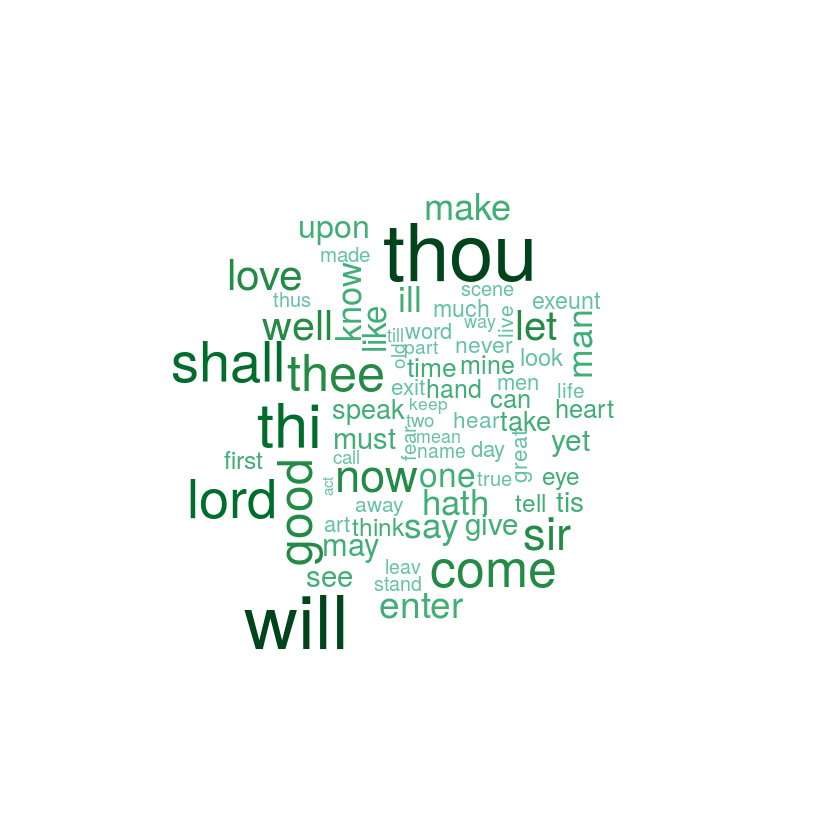

In [13]:
# Now, let's draw for example a wordcloud of the frequent terms.
library(wordcloud)
library(RColorBrewer)
palette <- brewer.pal(9,"BuGn")[-(1:4)]
wordcloud(rownames(TDM.dense), rowSums(TDM.dense), min.freq = 1, color = palette)

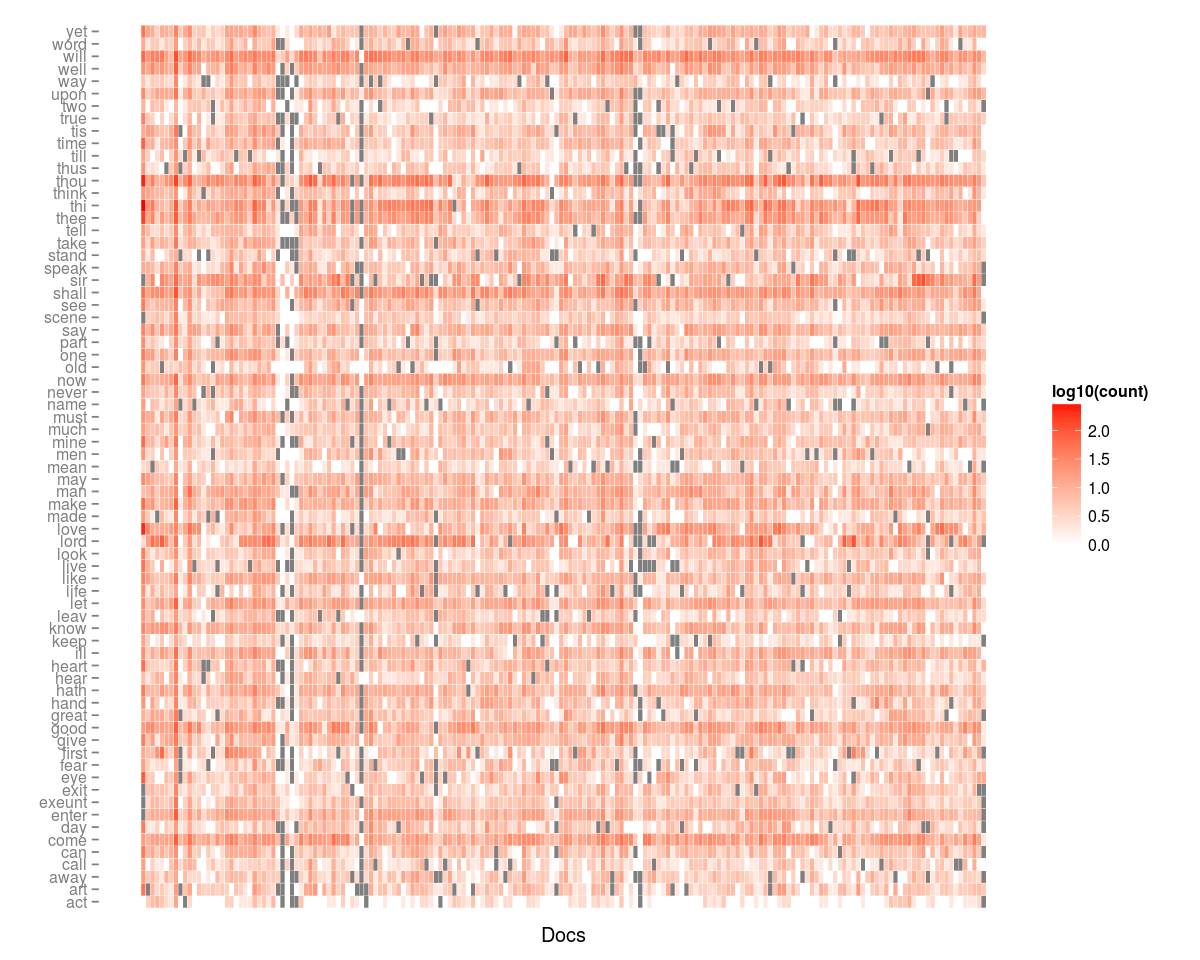

In [18]:
# Or how about a sort of heatmap of the documents where the frequent words appear?
library(reshape2)
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=8)
plot(ggplot(melt(TDM.dense, value.name = "count"), aes(x = Docs, y = Terms, fill = log10(count))) +
  geom_tile(colour = "white") +
  scale_fill_gradient(high="#FF0000" , low="#FFFFFF")+
  ylab("") +
  theme(panel.background = element_blank()) +
  theme(axis.text.x = element_blank(), axis.ticks.x = element_blank()))

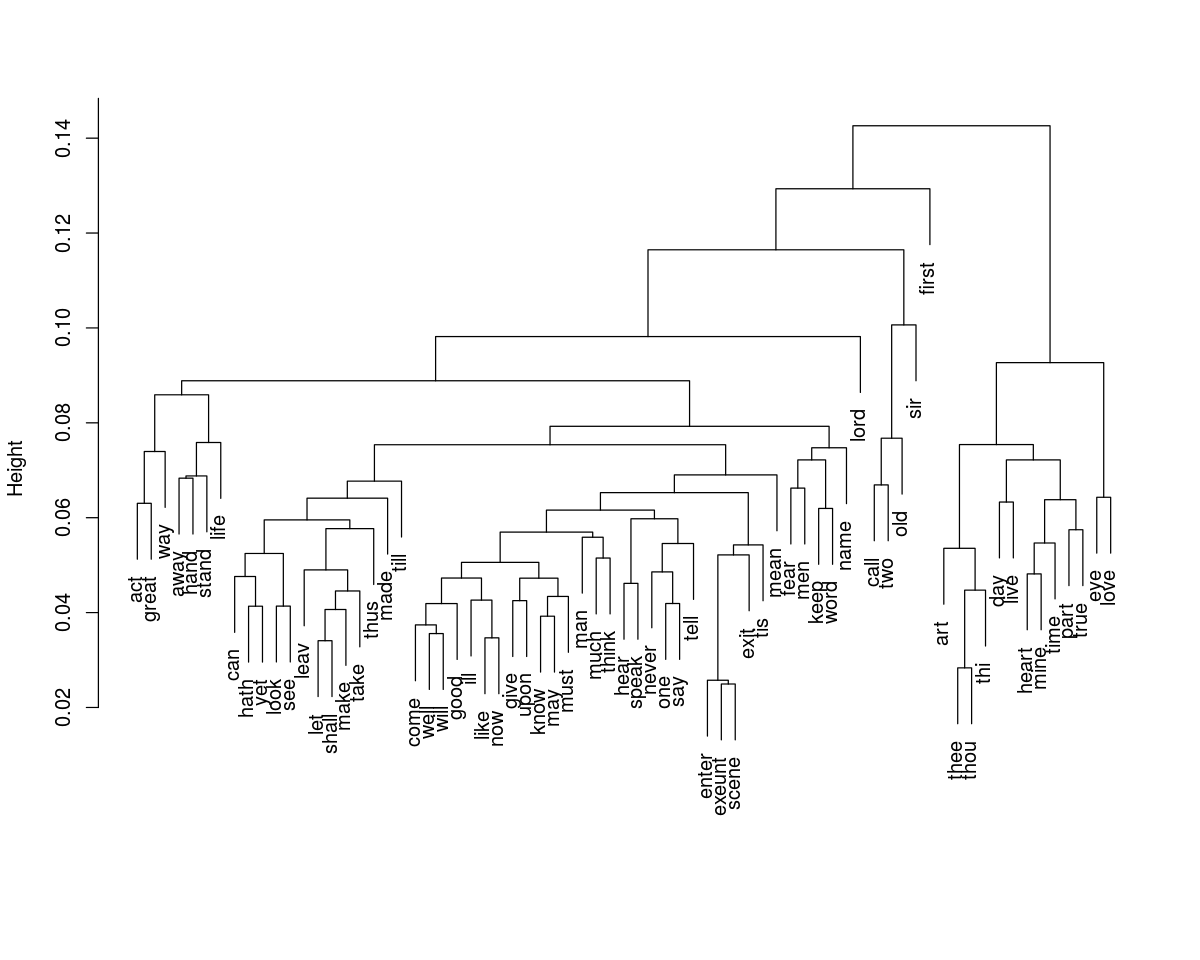

In [19]:
# Finally, let's try some clustering.
library(cluster)

TDM.scaled <- TDM.dense / rowSums(TDM.dense)

hclusters <- agnes(x = dist(TDM.scaled), method = "complete")

options(repr.plot.width=10, repr.plot.height=8)
plot(hclusters, which.plots = 2, main = "", sub = "", xlab = "")